In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.polynomial import Polynomial

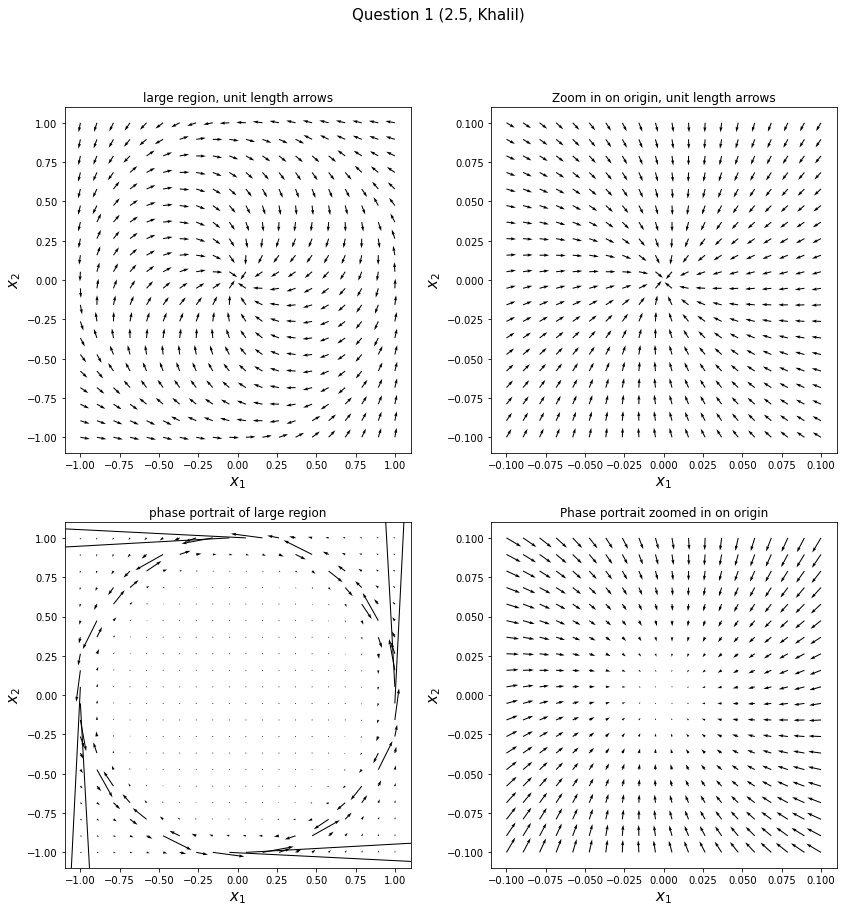

In [2]:
fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(nrows=2,ncols=2)
myrange = np.linspace(-1,1,20)
x1,x2 = np.meshgrid(myrange,myrange)
u = - x1 - x2/np.log(x1*x1+x2*x2)
v = -x2 + x1/np.log(x1*x1+x2*x2)
unorm = u/np.sqrt(u**2+v**2) #Make all arrows of unit length
vnorm = v/np.sqrt(u**2+v**2) #Make all arrows of unit length
ax3.quiver(x1,x2,u,v)
ax1.quiver(x1,x2,unorm,vnorm)
ax1.set_aspect('equal')
ax3.set_aspect('equal')
ax1.set_title('large region, unit length arrows')
ax3.set_title('phase portrait of large region')

myrange = np.linspace(-0.1,0.1,20)
x1,x2 = np.meshgrid(myrange,myrange)
u = - x1 - x2/np.log(x1*x1+x2*x2)
v = -x2 + x1/np.log(x1*x1+x2*x2)
unorm = u/np.sqrt(u**2+v**2)#Make all arrows of unit length
vnorm = v/np.sqrt(u**2+v**2)#Make all arrows of unit length
ax4.quiver(x1,x2,u,v)
ax2.quiver(x1,x2,unorm,vnorm)
ax2.set_aspect('equal')
ax4.set_aspect('equal')
ax2.set_title('Zoom in on origin, unit length arrows')
ax4.set_title('Phase portrait zoomed in on origin')

ax1.set_xlabel(r'$x_1$',fontsize=15)
ax1.set_ylabel(r'$x_2$',fontsize=15)
ax2.set_xlabel(r'$x_1$',fontsize=15)
ax2.set_ylabel(r'$x_2$',fontsize=15)
ax3.set_xlabel(r'$x_1$',fontsize=15)
ax3.set_ylabel(r'$x_2$',fontsize=15)
ax4.set_xlabel(r'$x_1$',fontsize=15)
ax4.set_ylabel(r'$x_2$',fontsize=15)

fig.set_size_inches(14,14)
plt.suptitle('Question 1 (2.5, Khalil)',fontsize=15)
plt.savefig('Assignment1/Q1')

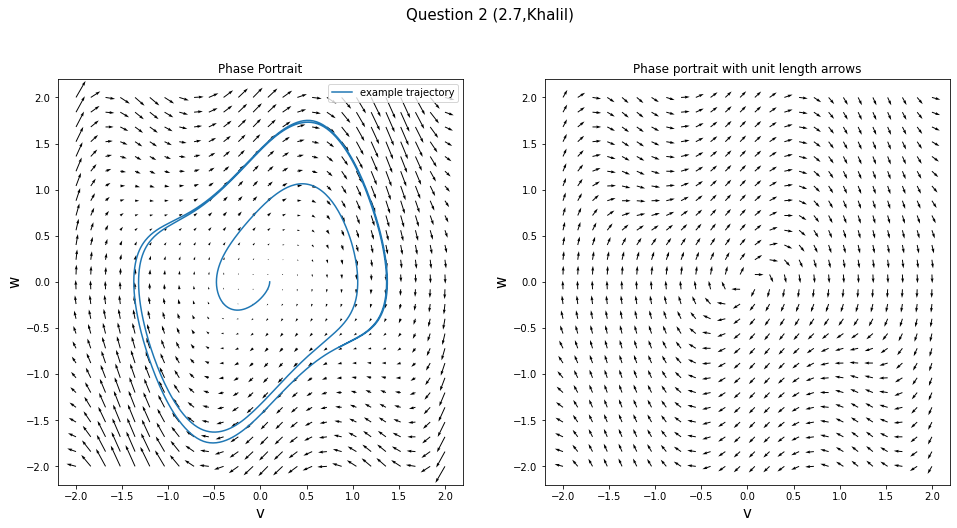

In [3]:
fig,[ax1,ax2] = plt.subplots(ncols=2)
myrange = np.linspace(-2,2,26)
v,w = np.meshgrid(myrange,myrange)
vdot = w
wdot = -v-(-1+3*v**2-v**4+v**6/15)*w
vdotnorm = vdot/np.sqrt(vdot**2+wdot**2)#Make all arrows of unit length
wdotnorm = wdot/np.sqrt(vdot**2+wdot**2)#Make all arrows of unit length
ax1.quiver(v,w,vdot,wdot)
ax2.quiver(v,w,vdotnorm,wdotnorm)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax1.set_title('Phase Portrait')
ax2.set_title('Phase portrait with unit length arrows')
plt.suptitle('Question 2 (2.7,Khalil)',fontsize=15)
fig.set_size_inches(16,8)

def derivative(t,state):
    v = state[0]
    w = state[1]
    return np.array([w,-v-(-1+3*v**2-v**4+v**6/15)*w])

trajectory = solve_ivp(derivative,[0,20],(0.1,0),t_eval=np.linspace(0,20,1000))
ax1.plot(trajectory.y[0],trajectory.y[1],label='example trajectory')
ax1.legend()

ax1.set_xlabel('v',fontsize=15)
ax1.set_ylabel('w',fontsize=15)
ax2.set_xlabel('v',fontsize=15)
ax2.set_ylabel('w',fontsize=15)
plt.savefig('Assignment1/Q2')

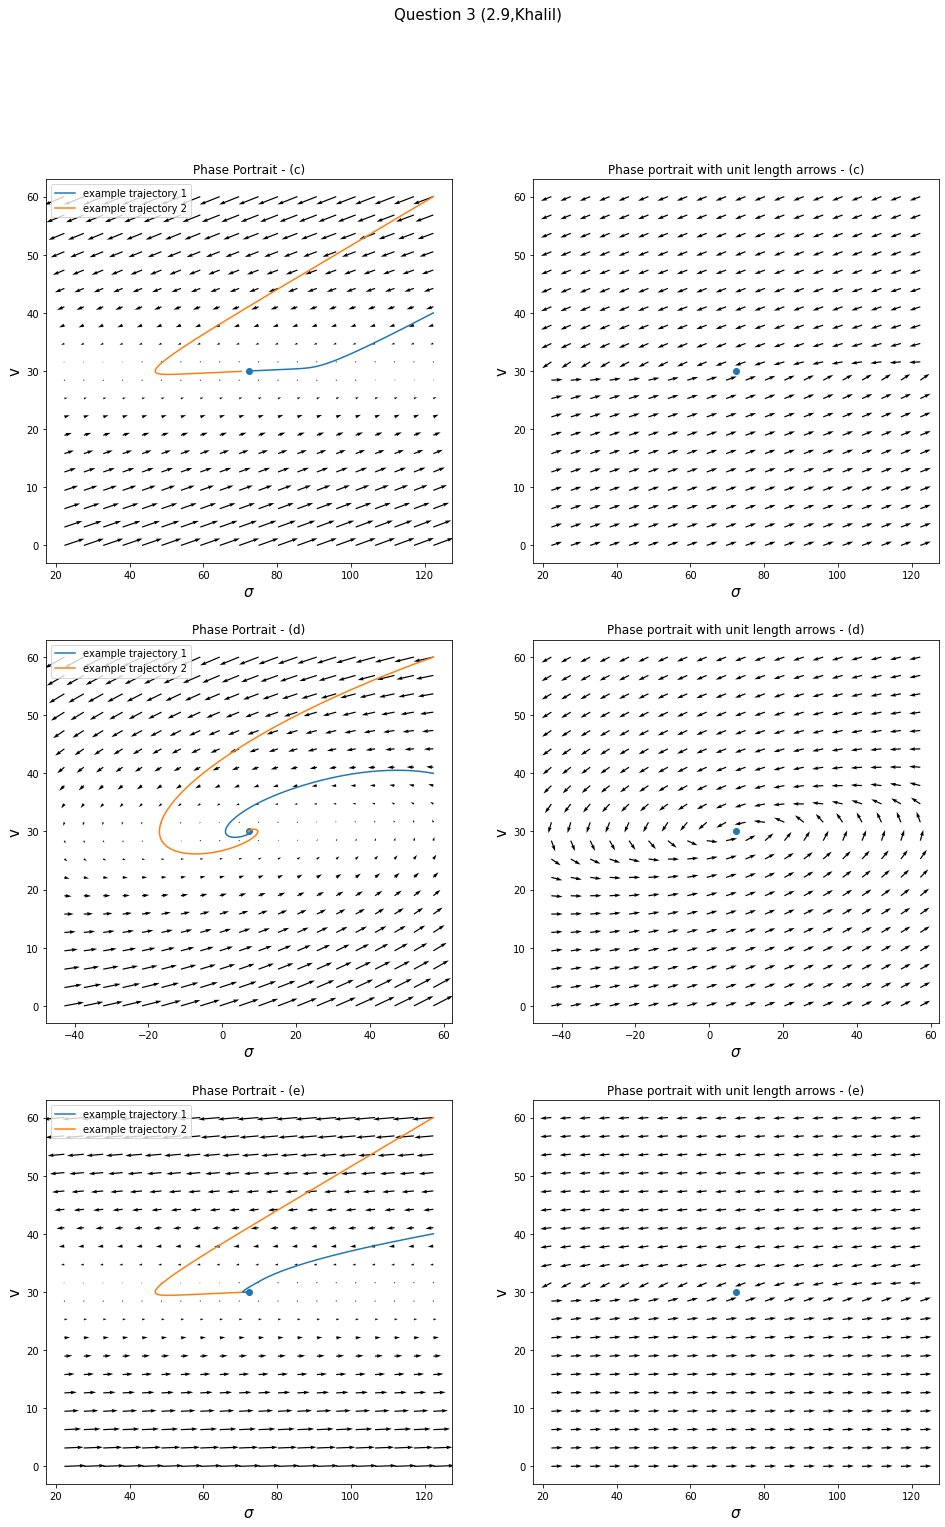

In [4]:
vd = 30
KI = 15
Kp = 500
Kc = 110
Kf = 2.5
Ka = 1
m = 1500

fig,[[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(nrows = 3,ncols=2)
myranges = np.linspace((Ka*vd*vd+Kf*vd+Kc)/KI-50,(Ka*vd*vd+Kf*vd+Kc)/KI+50,20)
myrangev = np.linspace(0,60,20)
s,vq3 = np.meshgrid(myranges,myrangev)
sdotq3 = vd-vq3
vdotq3 = (KI*s + Kp*(vd-vq3) - Kc-Kf*vq3-Ka*vq3*vq3)/m #sgn(v) = 1 for (most of) v>=0 region 
sdotnormq3 = sdotq3/np.sqrt(sdotq3**2+vdotq3**2)#Make all arrows of unit length
vdotnormq3 = vdotq3/np.sqrt(sdotq3**2+vdotq3**2)#Make all arrows of unit length
ax1.quiver(s,vq3,sdotq3,vdotq3)
ax2.quiver(s,vq3,sdotnormq3,vdotnormq3)
# ax1.set_aspect('equal')
# ax2.set_aspect('equal')
ax1.set_title('Phase Portrait - (c)')
ax2.set_title('Phase portrait with unit length arrows - (c)')
ax1.scatter((Ka*vd*vd+Kf*vd+Kc)/KI,vd)
ax2.scatter((Ka*vd*vd+Kf*vd+Kc)/KI,vd)

def derivativeq3(t,state):
    s = state[0]
    vq3 = state[1]
    return np.array([vd-vq3,(KI*s + Kp*(vd-vq3) - Kc-Kf*vq3-Ka*vq3*vq3)/m])

trajectory = solve_ivp(derivativeq3,[0,100],((Ka*vd*vd+Kf*vd+Kc)/KI+50,40),t_eval=np.linspace(0,100,1000))
ax1.plot(trajectory.y[0],trajectory.y[1],label='example trajectory 1')
ax1.legend()

trajectory = solve_ivp(derivativeq3,[0,100],((Ka*vd*vd+Kf*vd+Kc)/KI+50,60),t_eval=np.linspace(0,100,1000))
ax1.plot(trajectory.y[0],trajectory.y[1],label='example trajectory 2')
ax1.legend()

KI = 150
myranges = np.linspace((Ka*vd*vd+Kf*vd+Kc)/KI-50,(Ka*vd*vd+Kf*vd+Kc)/KI+50,20)
myrangev = np.linspace(0,60,20)
s,vq3 = np.meshgrid(myranges,myrangev)
sdotq3 = vd-vq3
vdotq3 = (KI*s + Kp*(vd-vq3) - Kc-Kf*vq3-Ka*vq3*vq3)/m #sgn(v) = 1 for (most of) v>=0 region 
sdotnormq3 = sdotq3/np.sqrt(sdotq3**2+vdotq3**2)#Make all arrows of unit length
vdotnormq3 = vdotq3/np.sqrt(sdotq3**2+vdotq3**2)#Make all arrows of unit length
ax3.quiver(s,vq3,sdotq3,vdotq3)
ax4.quiver(s,vq3,sdotnormq3,vdotnormq3)
# ax1.set_aspect('equal')
# ax2.set_aspect('equal')
ax3.set_title('Phase Portrait - (d)')
ax4.set_title('Phase portrait with unit length arrows - (d)')
ax3.scatter((Ka*vd*vd+Kf*vd+Kc)/KI,vd)
ax4.scatter((Ka*vd*vd+Kf*vd+Kc)/KI,vd)

trajectory = solve_ivp(derivativeq3,[0,100],((Ka*vd*vd+Kf*vd+Kc)/KI+50,40),t_eval=np.linspace(0,100,1000))
ax3.plot(trajectory.y[0],trajectory.y[1],label='example trajectory 1')
ax3.legend()

trajectory = solve_ivp(derivativeq3,[0,100],((Ka*vd*vd+Kf*vd+Kc)/KI+50,60),t_eval=np.linspace(0,100,1000))
ax3.plot(trajectory.y[0],trajectory.y[1],label='example trajectory 2')
ax3.legend()

KI = 15
myranges = np.linspace((Ka*vd*vd+Kf*vd+Kc)/KI-50,(Ka*vd*vd+Kf*vd+Kc)/KI+50,20)
myrangev = np.linspace(0,60,20)
s,vq3 = np.meshgrid(myranges,myrangev)
def u(s,v):
    uid = KI*s + Kp*(vd-vq3)
    return uid
sdotq3 = vd-vq3
u_values = u(s,vq3)
u_values[np.where(u_values<0)] = 0
u_values[np.where(u_values>1800)] = 1800
vdotq3 = (u_values - Kc-Kf*vq3-Ka*vq3*vq3)/m #sgn(v) = 1 for (most of) v>=0 region 
sdotnormq3 = sdotq3/np.sqrt(sdotq3**2+vdotq3**2)#Make all arrows of unit length
vdotnormq3 = vdotq3/np.sqrt(sdotq3**2+vdotq3**2)#Make all arrows of unit length
ax5.quiver(s,vq3,sdotq3,vdotq3)
ax6.quiver(s,vq3,sdotnormq3,vdotnormq3)
# ax1.set_aspect('equal')
# ax2.set_aspect('equal')
ax5.set_title('Phase Portrait - (e)')
ax6.set_title('Phase portrait with unit length arrows - (e)')
ax5.scatter((Ka*vd*vd+Kf*vd+Kc)/KI,vd)
ax6.scatter((Ka*vd*vd+Kf*vd+Kc)/KI,vd)

def derivativeq3e(t,state):
    s = state[0]
    vq3 = state[1]
    u = KI*s + Kp*(vd-vq3)
    if u<0:
        return np.array([vd-vq3,( 0 - Kc-Kf*vq3-Ka*vq3*vq3)/m])
    if u>1800:
        return np.array([vd-vq3,( 1800 - Kc-Kf*vq3-Ka*vq3*vq3)/m])
    return np.array([vd-vq3,( u - Kc-Kf*vq3-Ka*vq3*vq3)/m])
    
trajectory = solve_ivp(derivativeq3e,[0,100],((Ka*vd*vd+Kf*vd+Kc)/KI+50,40),t_eval=np.linspace(0,100,1000))
ax5.plot(trajectory.y[0],trajectory.y[1],label='example trajectory 1')
ax5.legend()

trajectory = solve_ivp(derivativeq3,[0,100],((Ka*vd*vd+Kf*vd+Kc)/KI+50,60),t_eval=np.linspace(0,100,1000))
ax5.plot(trajectory.y[0],trajectory.y[1],label='example trajectory 2')
ax5.legend()

ax1.set_ylabel('v',fontsize=15)
ax1.set_xlabel(r'$\sigma$',fontsize=15)
ax2.set_ylabel('v',fontsize=15)
ax2.set_xlabel(r'$\sigma$',fontsize=15)
ax3.set_ylabel('v',fontsize=15)
ax3.set_xlabel(r'$\sigma$',fontsize=15)
ax4.set_ylabel('v',fontsize=15)
ax4.set_xlabel(r'$\sigma$',fontsize=15)
ax5.set_ylabel('v',fontsize=15)
ax5.set_xlabel(r'$\sigma$',fontsize=15)
ax6.set_ylabel('v',fontsize=15)
ax6.set_xlabel(r'$\sigma$',fontsize=15)

plt.suptitle('Question 3 (2.9,Khalil)',fontsize=15)
fig.set_size_inches(16,24)

plt.savefig('Assignment1/Q3')

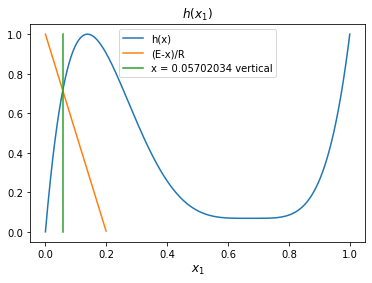

[0.05702034+0.j]
x1=(0.0570203379431842+0j) x2= (0.714898310284079-0j)


In [5]:
#Question 4
hpoly = Polynomial((0,17.76,-103.79,226.62,-226.31,83.72))
fppoly = hpoly - Polynomial((1,-1/0.2))

def h(x):
    return 17.76*x-103.79*x**2+229.62*x**3-226.31*x**4+83.72*x**5

xrange = np.linspace(0,1,1000)
plt.plot(xrange,h(xrange),label='h(x)')
plt.title(r'$h(x_1)$')
plt.xlabel(r'$x_1$',fontsize=12)
plt.plot(xrange[np.where(-(xrange-0.2)/0.2>0)],-(xrange[np.where(-(xrange-0.2)/0.2>0)]-0.2)/0.2, label='(E-x)/R')
plt.plot([0.05702034,0.05702034],[0,1],label='x = 0.05702034 vertical')
plt.legend()
plt.show()

roots = fppoly.roots()
realroots = roots[np.isreal(roots)] 
print(realroots)
print(f'x1={realroots[0]} x2= {-(realroots[0]-0.2)/0.2}')
# myrange = 

In [6]:
derivative = hpoly.deriv()
hprime = derivative(realroots[0])
print("h'(x1)=",hprime)
tr = -hprime/2e-12-0.2/5e-6
det = (hprime*0.2+1)/(2e-12*5e-6)
eigval_poly = Polynomial((det,-tr,1))
eigenvals = eigval_poly.roots()
print('The eigenvalues are', eigenvals)

h'(x1)= (7.97076137101644+0j)
The eigenvalues are [-3.98538066e+12+0.j -6.50917063e+04+0.j]


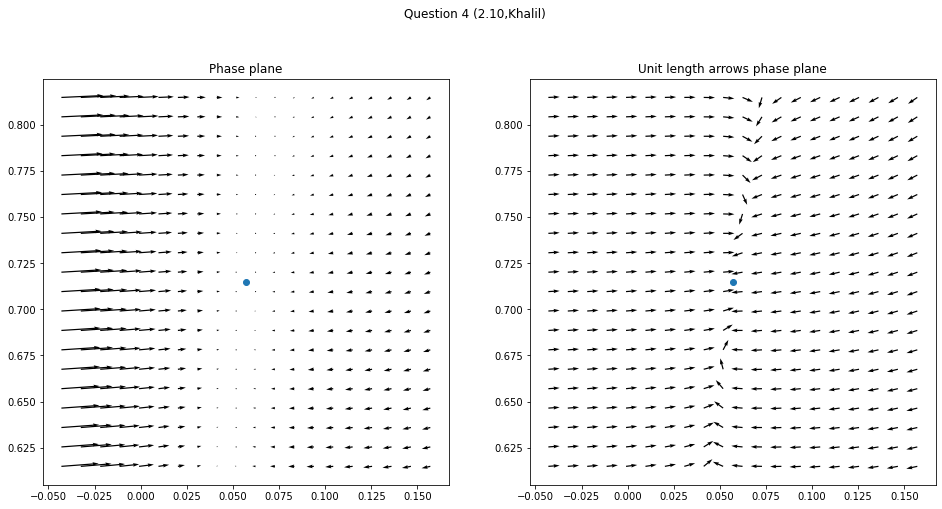

In [10]:
C = 1 #2e-12
L = 1 #5e-6
fig,[ax1,ax2] = plt.subplots(ncols = 2)
myrange1 = np.linspace(np.real(realroots[0])-0.1,np.real(realroots[0])+0.1,20)
myrange2 = np.linspace(np.real(-(realroots[0]-0.2)/0.2)-0.1,np.real(-(realroots[0]-0.2)/0.2)+0.1,20)
x,y = np.meshgrid(myrange1,myrange2)
p = (-h(x)+y)/C
q = (-x-0.2*y+0.2)/L
pnorm = p/np.sqrt(p*p+q*q)
qnorm = q/np.sqrt(p*p+q*q)
ax2.quiver(x,y,pnorm,qnorm)
ax2.scatter(np.real(realroots[0]),np.real(-(realroots[0]-0.2)/0.2))
ax1.quiver(x,y,p,q)
ax1.scatter(np.real(realroots[0]),np.real(-(realroots[0]-0.2)/0.2))
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax1.set_title('Phase plane')
ax2.set_title('Unit length arrows phase plane')

fig.set_size_inches(16,8)
plt.suptitle('Question 4 (2.10,Khalil)')
# plt.savefig('Assignment1/Q4_C=L=1')

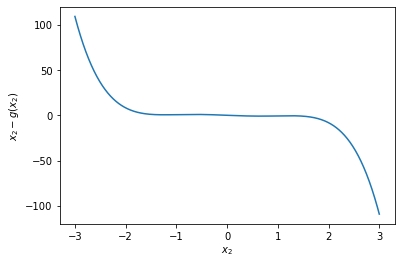

C:\Users\ambap\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


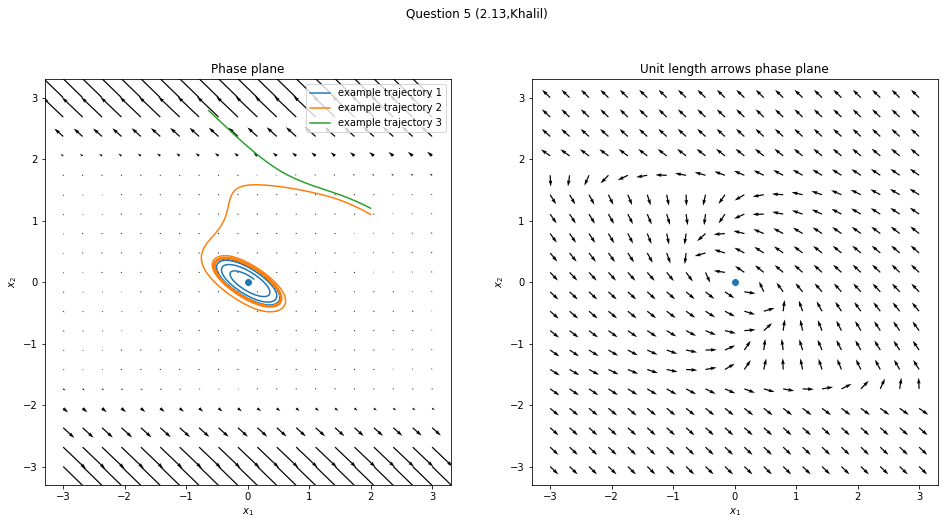

In [8]:
bound = 3 #Bounds or edges of the plot
def g(y):
    return 3.234*y-2.195*y**3+0.666*y**5
yrange = np.linspace(-bound,bound,1000)
plt.plot(yrange,yrange  - g(yrange))
plt.xlabel(r'$x_2$')
plt.ylabel(r'$x_2 - g(x_2)$')
plt.show()

fig,[ax1,ax2] = plt.subplots(ncols = 2)
myrange1q5 = np.linspace(-bound,bound,20)
myrange2q5 = np.linspace(-bound,bound,20)
x,y = np.meshgrid(myrange1q5,myrange2q5)
p = -x+y-g(y)
q = -(-x+y-g(y))-y
pnorm = p/np.sqrt(p*p+q*q)
qnorm = q/np.sqrt(p*p+q*q)
ax2.quiver(x,y,pnorm,qnorm)
ax2.scatter(0,0)
ax1.quiver(x,y,p,q)
ax1.scatter(0,0)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax1.set_title('Phase plane')
ax2.set_title('Unit length arrows phase plane')

fig.set_size_inches(16,8)
plt.suptitle('Question 5 (2.13,Khalil)')

def Q5derivative(t,state):
    x = state[0]
    y = state[1]
    xdot = -x+y-g(y)
    ydot = -(-x+y-g(y))-y
    return[xdot,ydot]

trajectory = solve_ivp(Q5derivative,[0,200],(0.1,0.05),t_eval=np.linspace(0,200,1000))
ax1.plot(trajectory.y[0],trajectory.y[1],label='example trajectory 1')

trajectory = solve_ivp(Q5derivative,[0,200],(2,1.1),t_eval=np.linspace(0,200,10000))
ax1.plot(trajectory.y[0],trajectory.y[1],label='example trajectory 2')

trajectory = solve_ivp(Q5derivative,[0,10],(2,1.2),t_eval=np.linspace(0,10,1000))
ax1.plot(trajectory.y[0],trajectory.y[1],label='example trajectory 3')

ax1.legend()
ax1.set_xlabel(r'$x_1$')
ax2.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax2.set_ylabel(r'$x_2$')

plt.savefig('Assignment1/Q5')